# TENZING PALDEN and BRANDON PRENZ (GROUP 22)
# APRIL 25 2022
# Project #4: Using Pivot Tables!


In [1]:
import csv
import pandas as pd
import datetime
import matplotlib as plt

In [2]:
#making a csv into a dataframe
df=pd.read_csv(r"/Users/tenzingpalden/Desktop/cis group 3/PROJECT 4/NYCFilmPermits_2017-21.csv")

In [3]:
#converting the column into a datetime type and taking the year portion out. Putting it into a new column called "year"
df['year'] = pd.to_datetime(df['StartDateTime']).dt.year

In [47]:
#query searching the dataframe for when the "year" column is less than or equal to 2020 and more than or equal to 2018.
#changed into a new dataframe just for visuals
within_years=df.query("year >=2018 and year <=2020 ")

In [5]:
#printing the number of rows and columns by getting the dimensions of the df with shape.
print("The number of rows and columns respectively is "+ str(within_years.shape))

The number of rows and columns respectively is (20010, 19)


In [6]:
#finding if any Nan values exist in the entire dataframe
within_years.isnull().values.any()

True

In [52]:
#creating the first pivot table by counting through all the columns.
pivot1=pd.pivot_table(within_years,index="Borough", margins=True,aggfunc="count")
pivot1

,Category,CommunityBoard(s),CountCommunityBoards,CountPolicePrecincts,CountZipCode,Country,DurationHrs,EndDateTime,EnteredOn,EventAgency,EventID,EventType,ParkingHeld,PolicePrecinct(s),StartDateTime,SubCategoryName,ZipCode(s),year
Borough,,,,,,,,,,,,,,,,,,
Bronx,800,800,800,800,800,800,800,800,800,800,800,800,800,800,800,800,800,800
Brooklyn,6409,6409,6409,6409,6409,6409,6409,6409,6409,6409,6409,6409,6409,6409,6409,6409,6409,6409
Manhattan,9055,9050,9055,9050,9050,9055,9055,9055,9055,9055,9055,9055,9055,9050,9055,9055,9050,9055
Queens,3427,3425,3427,3425,3425,3427,3427,3427,3427,3427,3427,3427,3427,3425,3427,3427,3425,3427
Staten Island,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319
All,20003,20003,20003,20003,20003,20003,20003,20003,20003,20003,20003,20003,20003,20003,20003,20003,20003,20003


In [31]:
#the second pivot table creted with 2 indexes. Therefore the aggfunc is written in dictonary format. finding max of the duration column within the index.
pivot2=pd.pivot_table(within_years,index=["year","Category"], aggfunc={"DurationHrs":max})
pivot2.columns = ['Maximum Duration in hours']
pivot2

Maximum Duration in hours
year Category                                    
2018 Commercial                             65.98
     Documentary                           130.00
     Film                                  228.00
     Music Video                            41.50
     Still Photography                     179.00
     Student                                14.00
     Television                            744.00
     Theater                              1583.97
     WEB                                   185.98
2019 Commercial                            167.98
     Documentary                            27.00
     Film                                   61.00
     Music Video                            28.00
     Still Photography                      84.00
     Student                                13.98
     Television                           8610.98
     Theater                               784.00
     WEB                                   161.98
2020 Commercial                             36.00
     Documentary                            23.98
     Film                                   36.00
     Music Video                            17.00
     Still Photography                      19.00
     Student                                15.00
     Television                           8640.98
     Theater                               479.97
     WEB                                   729.00

In [10]:
#new dataframe made when the "category" column equals Film and the boolean is true.
filtered=within_years.loc[within_years["Category"]== "Film"]

In [36]:
#this pivot table is made when the new dataframe with the contraints and is set to count.
final_pivot=pd.pivot_table(filtered,index=["Borough"], columns="year",aggfunc={"year": "count"})
final_pivot

year             
year            2018   2019  2020
Borough                          
Bronx           74.0   54.0   4.0
Brooklyn       448.0  373.0  39.0
Manhattan      545.0  499.0  87.0
Queens          91.0  117.0  24.0
Staten Island   48.0   52.0   NaN

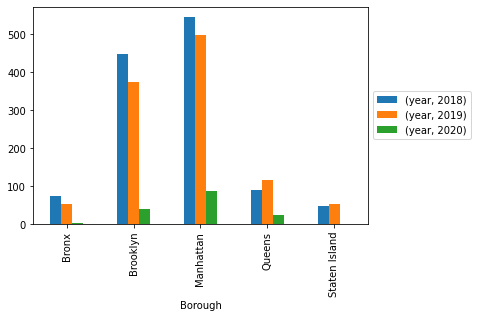

In [33]:
#this bar graph is made with the pivot table and custom legend position.
final_pivot.plot(kind="bar").legend(loc='center left', bbox_to_anchor=(1, 0.5))

This project was helpful in understanding the relationship between dataframes and pivot tables. They flow into eachother and go seemlessly into a graph. This exercise showed that there are more film permits in Manhttan and Brooklyn  rather than any other borough. We had some problems interpreting the prompt however we did the best we could representing the data.
